In [1]:
import sys
sys.path.append('/Users/tunadorable/local-repos/next-concept-predictor/venv/lib/python3.11/site-packages')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

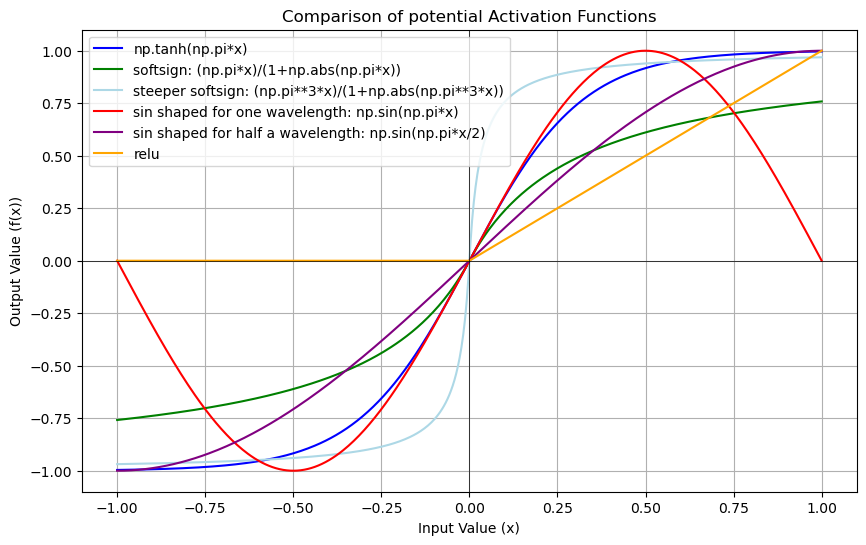

In [24]:
# Adjust the range of values from -1 to 1
x = np.linspace(-1, 1, 400)

# Calculate tanh, softsign values
y_tanh = np.tanh(np.pi*x)
y_softsign = (np.pi *x) / (1 + np.abs(np.pi *x))
y_softsign_steep = (np.pi**3 *x) / (1 + np.abs(np.pi**3 *x))

# Shape the sin function to have one single wavelength in the range -1 to 1
# One wavelength of sin in this range would be sin(pi*x)
y_sin = np.sin(np.pi * x)
y_2sin = np.sin(0.5*np.pi*x)

# relu
y_relu = np.maximum(0,x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_tanh, label='np.tanh(np.pi*x)', color='blue')
plt.plot(x, y_softsign, label='softsign: (np.pi*x)/(1+np.abs(np.pi*x))', color='green')
plt.plot(x, y_softsign_steep, label='steeper softsign: (np.pi**3*x)/(1+np.abs(np.pi**3*x))', color='lightblue')
plt.plot(x, y_sin, label='sin shaped for one wavelength: np.sin(np.pi*x)', color='red')
plt.plot(x, y_2sin, label='sin shaped for half a wavelength: np.sin(np.pi*x/2)', color='purple')
plt.plot(x, y_relu, label='relu', color='orange')
plt.title('Comparison of potential Activation Functions')
plt.xlabel('Input Value (x)')
plt.ylabel('Output Value (f(x))')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.savefig("activations_1d.png", bbox_inches="tight")
plt.show()

### let's get a set of hypersphere embeddings and see what each activation function does to them

In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Function to create a sphere
def create_sphere(ax, radius=1, color='lightblue', alpha=0.2):
    # Create a sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    ax.plot_surface(x, y, z, color=color, alpha=alpha)

In [6]:
# Function to add planes at the axes
def add_planes(ax, radius=1):
    # Planes on axes
    u = np.linspace(-radius, radius, 100)
    v = np.linspace(-radius, radius, 100)
    u, v = np.meshgrid(u, v)
    zeros = np.zeros_like(u)

    # XY, YZ, ZX planes
    ax.plot_surface(u, v, zeros, alpha=0.1)
    ax.plot_surface(zeros, u, v, alpha=0.1)
    ax.plot_surface(v, zeros, u, alpha=0.1)
    
    # Setting labels for each axis
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

In [7]:
# Function to determine if a point is in front of the sphere & set color according to gradient
def point_color(x, y, z):
    c = ((x + 1) / 2 + (-y + 1) / 2 + (z + 1) / 2)/3
    return c/2+0.5

In [8]:
def point_alpha(x, y, z):
    # Normalize each coordinate to a range of [0, 1] and sum them
    # Assuming x, y, z are within [-1, 1] as in the case of a unit sphere
    normalized_sum = (x + 1) / 2 + (-y + 1) / 2 + (z + 1) / 2
    # Divide by 3 to get the average, ensuring alpha is within [0, 1]
    return normalized_sum / 3

In [13]:
def plot_sphere(x, name):
    # Initialize the plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a sphere
    create_sphere(ax)

    # Add planes
    add_planes(ax)

    X = x.detach().cpu().numpy()
    for i in range(v):
        x = X[i,0]
        y = X[i,1]
        z = X[i,2]
        #print(x,y,z)
        # Change color and alpha based on position
        ap = point_alpha(x,y,z)
        cp = point_color(x,y,z)
        ax.scatter(x, y, z, color=(cp,0.2,0.2), alpha=ap)

    # Set limits
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

    plt.savefig(f'{name}.png', bbox_inches='tight')

    # Show plot
    plt.show()

In [11]:
v=500
d=3
E = torch.randn(v,d)

-0.6453598 -0.17448467 0.743684
0.96276057 -0.20829931 0.17234686
0.16979222 -0.7052354 -0.6883412
-0.78799266 0.2781295 0.5492827
0.36838433 -0.49526045 -0.78677195
-0.39367697 0.7304627 0.5580704
0.3376092 0.33542067 -0.87949586
0.8230382 -0.56400543 0.06712679
0.09287796 -0.8790266 0.46763876
-0.08732965 -0.4615588 0.8828007
0.6884746 0.009567038 0.7251974
0.45186567 0.13858342 -0.881256
-0.6456313 0.44213322 0.6226382
0.34583506 0.76804626 0.53898335
0.13346615 0.9865258 -0.09462365
0.7980375 0.58682007 0.13703375
-0.4331803 0.63741314 0.63722783
-0.14294142 0.95594037 -0.2564094
0.85746807 -0.09315087 -0.506035
-0.7820004 -0.42080355 0.4597823
-0.55190647 0.30720845 -0.7752563
-0.5876039 0.14723039 0.79564124
0.28638378 -0.94163805 0.17692393
0.7664591 -0.601793 0.22446725
0.88706666 -0.26114285 0.38067967
0.9341364 -0.02367799 -0.35612985
-0.4372167 0.8993246 0.00754777
-0.73168653 -0.65532976 -0.18755732
-0.58772033 0.74649507 0.31197762
0.98575974 0.06068979 0.15682629
-0.42977

0.80105156 0.3642387 0.47502258
0.49493715 -0.40508977 0.7687259
-0.7731215 -0.569744 -0.2787021
0.7618882 0.5701373 -0.30735934
-0.3657267 0.7415643 0.562429
-0.10022255 -0.14155093 -0.98484457
-0.73628694 -0.3726801 -0.564793
-0.5830126 -0.23520163 -0.7776738
-0.120525315 -0.5550894 -0.82301235
0.93565387 0.049104508 0.34948617
-0.59450245 0.19580275 -0.7798898
0.6006725 0.46535212 0.6501077
0.7235011 0.57463706 0.3825422
-0.29863593 -0.91201115 -0.2811626
0.7037176 -0.5367995 -0.4654329
0.12519161 0.87214166 -0.4729651
0.8172309 0.5187779 -0.2510047
-0.12976407 -0.92918855 0.34607795
0.04993724 0.48844594 0.871164
0.6858927 -0.7077571 0.16920742
0.3405936 -0.063349515 0.938074
-0.6515867 -0.40064672 0.64414054
0.69255745 0.6413166 0.33026838
0.88703924 -0.29327798 -0.3565801
0.3187847 0.7871083 0.52805
-0.6981989 0.6579608 0.28214526
-0.5670739 0.00882386 -0.82361966
0.09793513 0.8847457 -0.45566845
-0.7161521 -0.69767636 0.019333022
-0.8816493 0.22933437 0.41243204
0.031502444 0.36

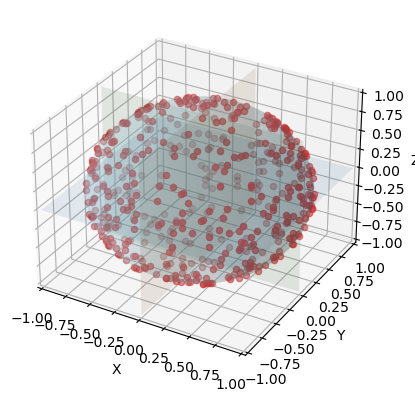

CPU times: user 17.1 s, sys: 1.05 s, total: 18.1 s
Wall time: 6.84 s


In [12]:
%%time
E_ = E / torch.norm(E, p=2, dim=1, keepdim=True)
plot_sphere(E_, 'cosine_norm')

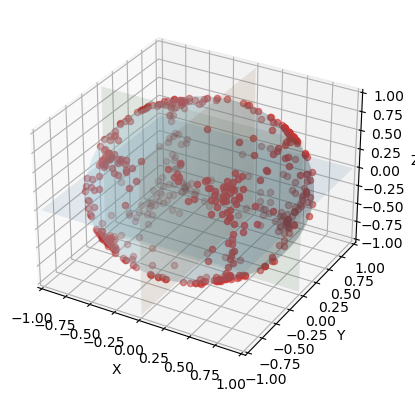

CPU times: user 17.6 s, sys: 1.23 s, total: 18.9 s
Wall time: 6.61 s


In [14]:
%%time
E_tanh=torch.tanh(np.pi*E_)
E_tanh = E_tanh / torch.norm(E_tanh, p=2, dim=1, keepdim=True)
plot_sphere(E_tanh, 'tanh')

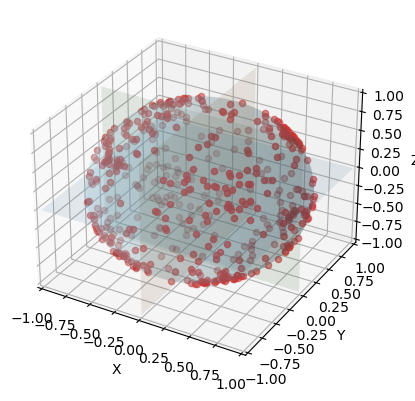

CPU times: user 18.2 s, sys: 1.14 s, total: 19.3 s
Wall time: 7.22 s


In [15]:
%%time
E_sin=torch.sin(np.pi*E_)
E_sin = E_sin / torch.norm(E_sin, p=2, dim=1, keepdim=True)
plot_sphere(E_sin, 'sin')

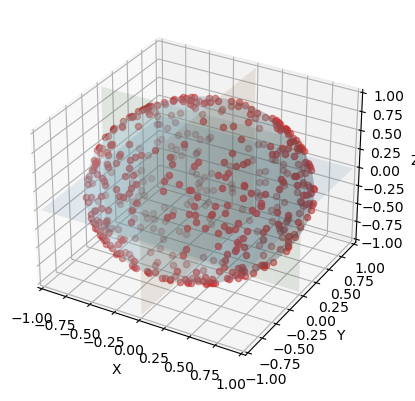

CPU times: user 17.7 s, sys: 955 ms, total: 18.7 s
Wall time: 6.78 s


In [16]:
%%time
E_2sin=torch.sin(0.5*np.pi*E_)
E_2sin = E_2sin / torch.norm(E_2sin, p=2, dim=1, keepdim=True)
plot_sphere(E_2sin, '2sin')

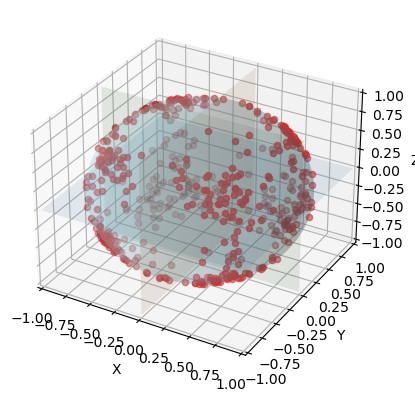

CPU times: user 16.3 s, sys: 806 ms, total: 17.1 s
Wall time: 6.85 s


In [17]:
%%time
E_softsign=torch.nn.functional.softsign(np.pi*E_)
E_softsign = E_softsign / torch.norm(E_softsign, p=2, dim=1, keepdim=True)
plot_sphere(E_softsign, 'softsign')

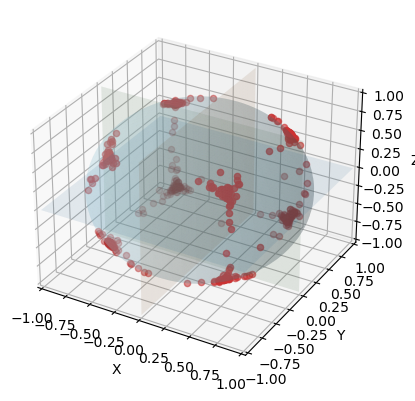

CPU times: user 17.2 s, sys: 714 ms, total: 17.9 s
Wall time: 6.96 s


In [18]:
%%time
E_softsign_steep=torch.nn.functional.softsign(np.pi**3*E_)
E_softsign_steep = E_softsign_steep / torch.norm(E_softsign_steep, p=2, dim=1, keepdim=True)
plot_sphere(E_softsign_steep, 'softsign_steep')